# Full Face Vs. Masked Face

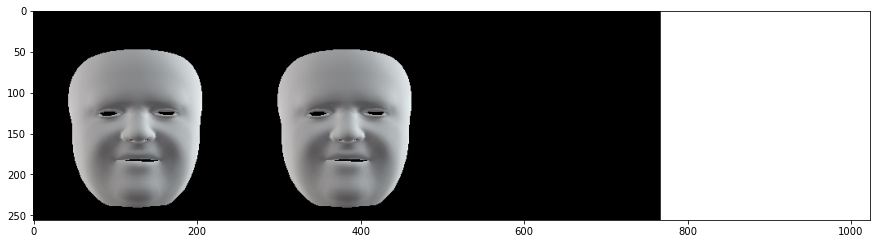

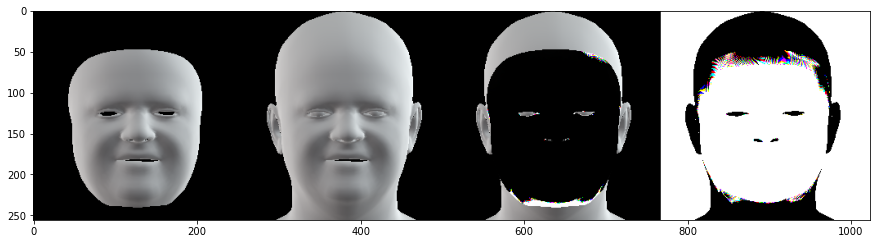

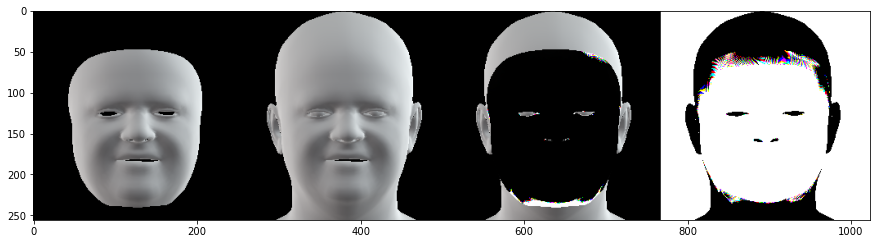

In [8]:
import torch as th
import PIL
import numpy as np
import blobfile as bf
import matplotlib.pyplot as plt


def load_image(path):
    with bf.BlobFile(path, "rb") as f:
        pil_image = PIL.Image.open(f)
        pil_image.load()
    pil_image = pil_image.convert("RGB")
    return np.array(pil_image)

img_name = '60011'
path = "/data/mint/DPM_Dataset/ffhq_256_with_anno/"
masked_wclip = load_image(f"{path}/deca_masked_face_images_wclip/valid/{img_name}.png")
masked_woclip = np.load(f"{path}/deca_masked_face_images_woclip/valid/{img_name}.npy", allow_pickle=True)
masked_woclip = th.tensor(masked_woclip).mul(255).add_(0.5).clamp_(0, 255).numpy().astype(np.uint8)
full_face = load_image(f"{path}/rendered_images/deca_shape_images/valid/{img_name}.png")

diff = (((masked_wclip - masked_woclip) < 1e-6)*255).astype(np.uint8)
plt.figure(figsize=(15, 15))
plt.imshow(np.concatenate((masked_wclip, masked_woclip, masked_wclip - masked_woclip, diff), axis=1))
plt.show()

diff = (((masked_wclip - full_face) < 1e-6)*255).astype(np.uint8)
plt.figure(figsize=(15, 15))
plt.imshow(np.concatenate((masked_wclip, full_face, full_face - masked_wclip, diff), axis=1))
plt.show()

diff = (((masked_woclip - full_face) < 1e-6)*255).astype(np.uint8)
plt.figure(figsize=(15, 15))
plt.imshow(np.concatenate((masked_woclip, full_face, full_face - masked_woclip, diff), axis=1))
plt.show()